In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load datasets
religion_population_df = pd.read_csv('archive/Religion_Population_Distribution.csv')
yearly_demographic_df = pd.read_csv('archive/Yearly_Demographic_Statistics.csv')
province_population_trends_df = pd.read_csv('archive/Province_Territory_Population_Trends.csv')
age_group_gender_distribution_df = pd.read_csv('archive/Age_Group_Gender_Distribution.csv')
population_age_distribution_df = pd.read_csv('archive/Population_Age_Distribution.csv')
district_fertility_population_survey_df = pd.read_csv('archive/District_Fertility_Population_Survey.csv')
city_population_growth_trends_df = pd.read_csv('archive/City_Population_Growth_Trends.csv')

In [17]:
# Drop the unnamed column
religion_population_df.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first few rows
religion_population_df.head()

,Religion,Population
0,Muslims,231686709
1,Hindus,3867729
2,Christians,3300788
3,Scheduled Castes,1349487
4,Ahmadiyya,162684


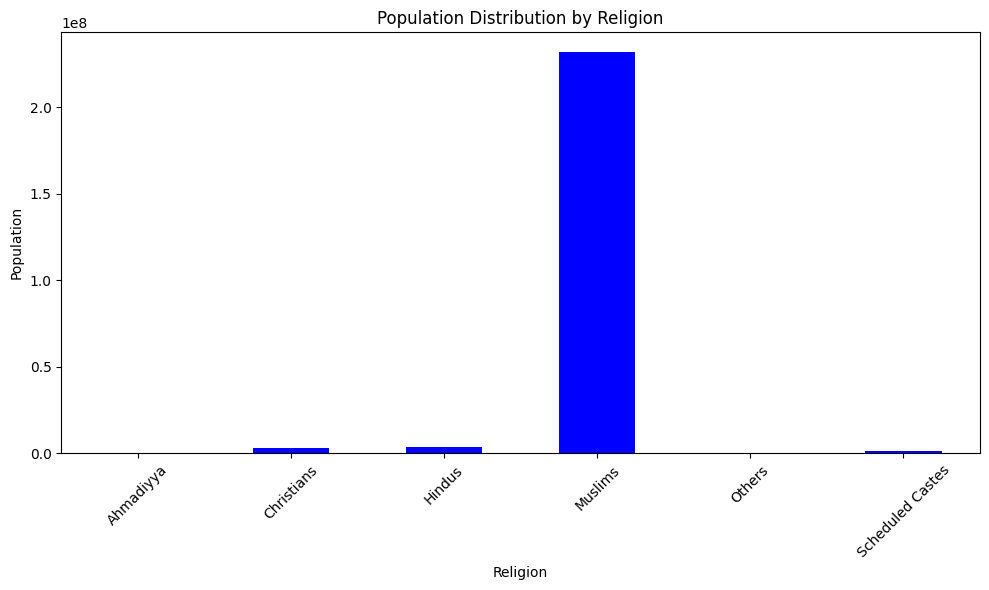

In [18]:
# Group by Religion and sum Population
religion_population = religion_population_df.groupby('Religion')['Population'].sum()
# Plotting Bar Chart
plt.figure(figsize=(10, 6))
religion_population.plot(kind='bar', color='blue')
plt.title('Population Distribution by Religion')
plt.xlabel('Religion')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()

In [19]:
# Drop the unnamed column
yearly_demographic_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert relevant columns to numeric
cols_to_convert = ['Mid-year population', 'Annual live births', 'Annual deaths', 'Annual natural increase', 'CBR', 'CDR', 'RNC', 'Crude migration rate (per 1,000)', 'IMR', 'TFR', 'Life expectancy', 'Life expectancy.1']
yearly_demographic_df[cols_to_convert] = yearly_demographic_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the first few rows
yearly_demographic_df.head()

,Year,Mid-year population,Annual live births,Annual deaths,Annual natural increase,CBR,CDR,RNC,"Crude migration rate (per 1,000)",IMR,TFR,Life expectancy,Life expectancy.1
0,Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,37696264.0,1647739.0,1173219.0,474520.0,43.7,31.1,12.6,NaN,263.4,6.8,36.2,33.4
2,1951,38215785.0,1686378.0,1121858.0,564520.0,44.1,29.4,14.8,-1.0,252.9,6.8,37.5,34.6
3,1952,38816777.0,1727288.0,1089817.0,637471.0,44.5,28.1,16.4,-0.7,243.3,6.8,38.6,35.8
4,1953,39488228.0,1768524.0,1063098.0,705426.0,44.8,26.9,17.9,-0.6,234.1,6.8,39.8,36.9


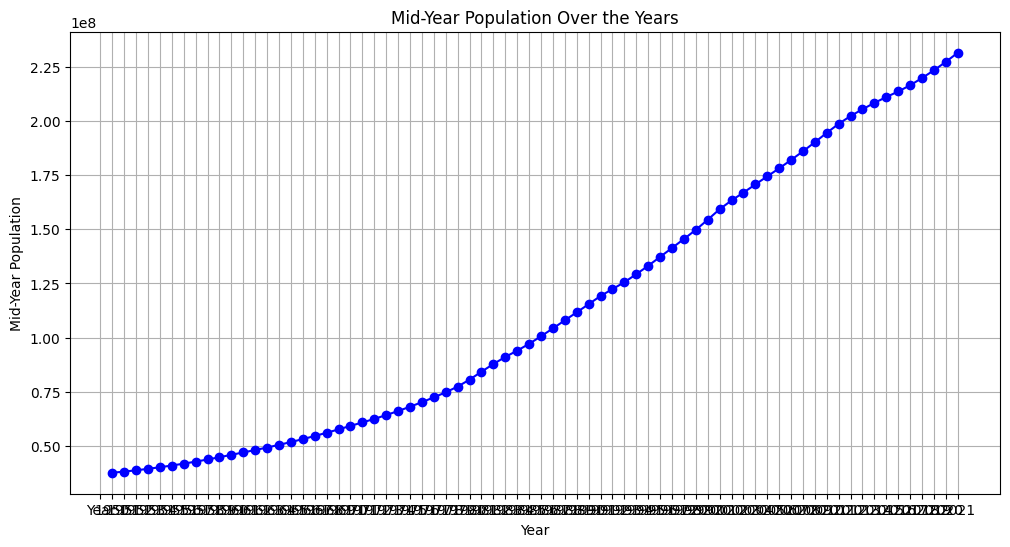

In [23]:
# Plot mid-year population over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_demographic_df['Year'], yearly_demographic_df['Mid-year population'], marker='o', color='blue')
plt.title('Mid-Year Population Over the Years')
plt.xlabel('Year')
plt.ylabel('Mid-Year Population')
plt.grid(True)
plt.show()

In [21]:
population_age_distribution_df.head()

,Unnamed: 0,Year,Population,% Population aged 0 to 14,% Population aged 15 to 64,% Population aged 65 or more
0,0,1950,37696264.0,40.5%,54.0%,5.5%
1,1,1955,NaN,40.3%,55.3%,4.4%
2,2,1960,45954226.0,40.6%,55.6%,3.7%
3,3,1965,51841626.0,42.3%,54.4%,3.4%
4,4,1970,59290872.0,43.7%,53.0%,3.3%


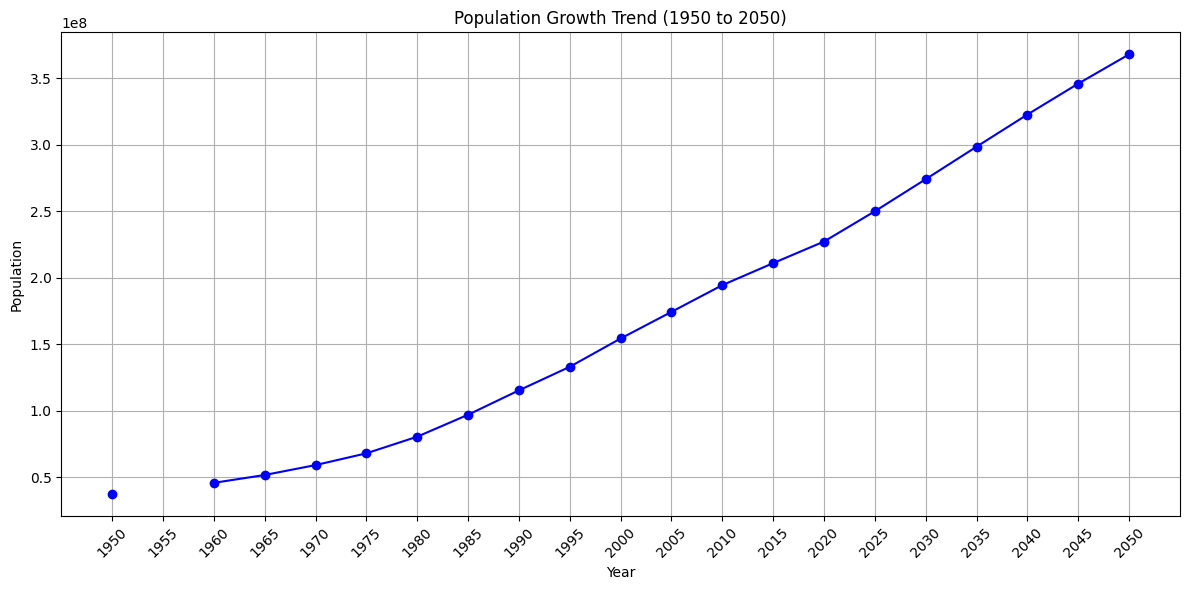

In [11]:
# Plotting the line chart
plt.figure(figsize=(12, 6))
plt.plot(population_age_distribution_df['Year'], population_age_distribution_df['Population'], marker='o', color='blue')
plt.title('Population Growth Trend (1950 to 2050)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(population_age_distribution_df['Year'], rotation=45)
plt.grid()
plt.tight_layout()

# Show the line chart
plt.show()

In [12]:
# Drop the unnamed column
province_population_trends_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert relevant columns to numeric
cols_to_convert = ['1951[11]', '1961[11]', '1972[11]', '1981[11]', '1998[11]', '2017[3]', '2023[13]']
province_population_trends_df[cols_to_convert] = province_population_trends_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the first few rows
province_population_trends_df.head()

,Province or Territory,1951[11],1961[11],1972[11],1981[11],1998[11],2017[3],2023[13]
0,Punjab,20540762.0,25463974.0,37607423.0,47292441.0,73691290,109989655,127688922.0
1,Sindh,6047748.0,8367065.0,14155909.0,19028666.0,30439893,47854510,55696147.0
2,Khyber Pakhtunkhwa,5888550.0,7578186.0,10879781.0,13259875.0,20919976,35501964,40856097.0
3,Balochistan,1167167.0,1353484.0,2428678.0,4332376.0,6565885,12335129,14894402.0
4,ICT,NaN,117669.0,237549.0,340286.0,805235,2003368,2363863.0


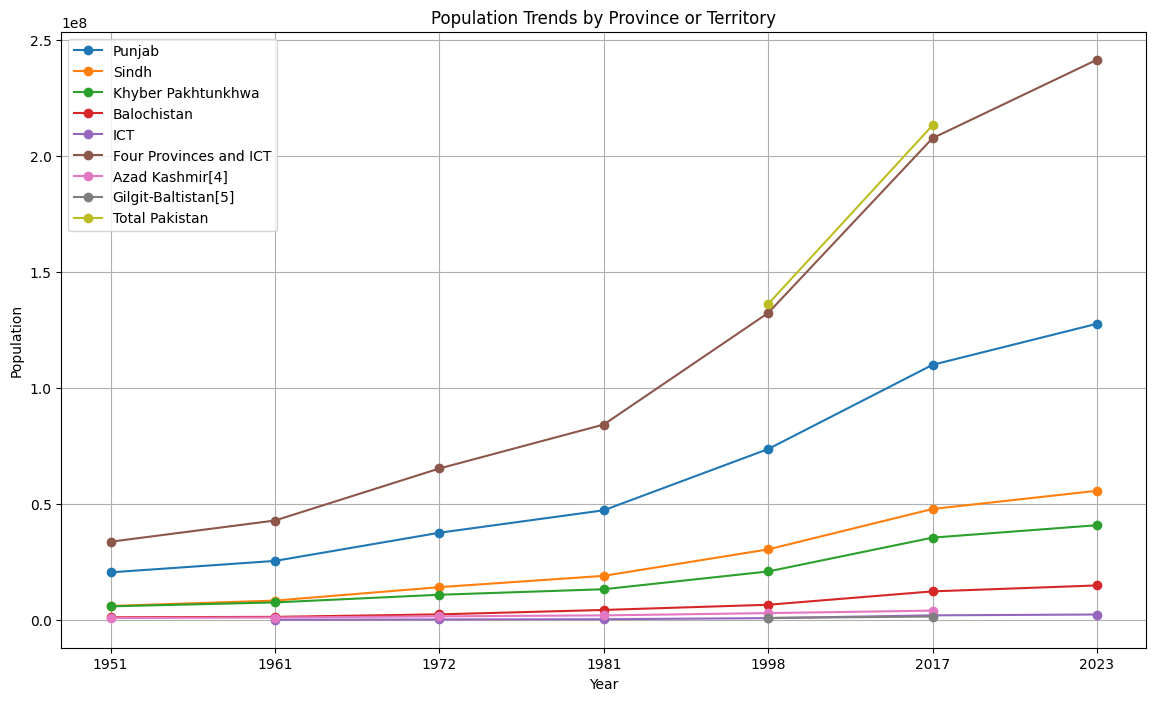

In [13]:
# Plot population trends by province
plt.figure(figsize=(14, 8))
for province in province_population_trends_df['Province or Territory'].unique():
    province_data = province_population_trends_df[province_population_trends_df['Province or Territory'] == province]
    plt.plot(['1951', '1961', '1972', '1981', '1998', '2017', '2023'],
             province_data.iloc[0, 1:], marker='o', label=province)
plt.title('Population Trends by Province or Territory')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# Drop the unnamed column
age_group_gender_distribution_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert relevant columns to numeric
cols_to_convert = ['Male', 'Female', 'Total', 'Sex ratio', 'Percent']
age_group_gender_distribution_df[cols_to_convert] = age_group_gender_distribution_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the first few rows
age_group_gender_distribution_df.head()

,Age Group,Male,Female,Total,Sex ratio,Percent
0,Total,NaN,NaN,NaN,106.12,NaN
1,0 – 4,18744989.0,17726432.0,36471421.0,105.10,NaN
2,5 – 9,16566852.0,15705284.0,32272136.0,108.80,NaN
3,10 – 14,14971914.0,13817137.0,28790182.0,111.80,NaN
4,15 – 19,12581753.0,11569893.0,24154118.0,108.00,NaN


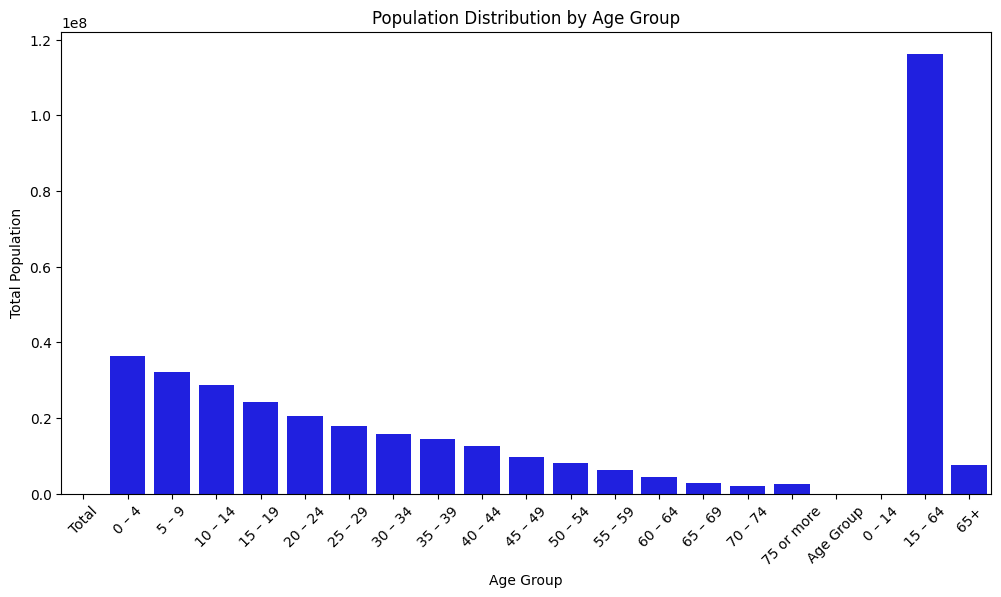

In [26]:
# Plot age group distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Total', color='blue',  data=age_group_gender_distribution_df)
plt.title('Population Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Population')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Drop the unnamed column
district_fertility_population_survey_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert relevant columns to numeric
district_fertility_population_survey_df['Margin of error'] = pd.to_numeric(district_fertility_population_survey_df['Margin of error'], errors='coerce')

# Display the first few rows
district_fertility_population_survey_df.head()

,District,Province,Total fertility rate,Margin of error,Year of survey,2017 Population
0,Lahore,Punjab,3.1,NaN,2017–18[33],11119985
1,Faisalabad,Punjab,3.3,NaN,2017–18[33],7882444
2,Rawalpindi,Punjab,3.2,NaN,2017–18[33],5402380
3,Gujranwala,Punjab,3.4,NaN,2017–18[33],5011066
4,Rahim Yar Khan,Punjab,4.6,NaN,2017–18[33],4807762


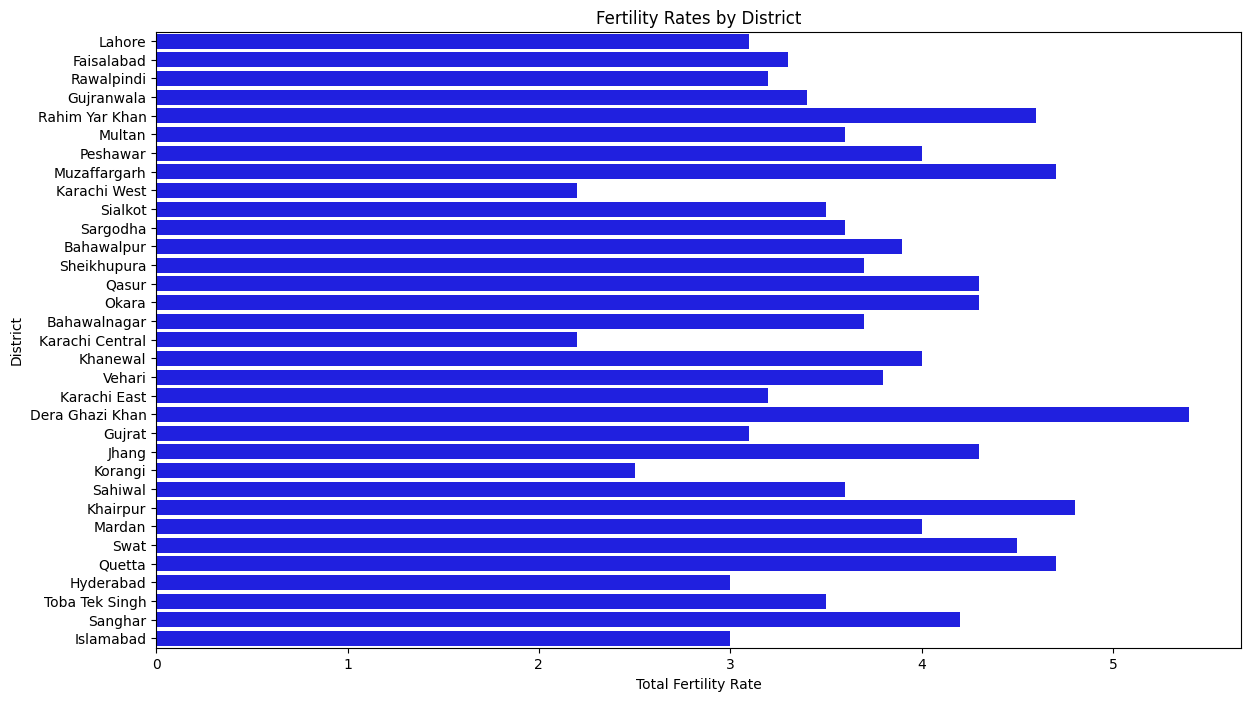

In [29]:
# Plot fertility rates by district
plt.figure(figsize=(14, 8))
sns.barplot(x='Total fertility rate', y='District', color='blue', data=district_fertility_population_survey_df, ci=None)
plt.title('Fertility Rates by District')
plt.xlabel('Total Fertility Rate')
plt.ylabel('District')
plt.show()

In [30]:
# Drop the unnamed column
city_population_growth_trends_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert relevant columns to numeric
cols_to_convert = ['Avg. Annual Growth Rate (2017-2023)', 'Avg. Annual Growth Rate (1998-2017)']
city_population_growth_trends_df[cols_to_convert] = city_population_growth_trends_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Display the first few rows
city_population_growth_trends_df.head()

,City Name,Province or Territory,2023 Population[15],Avg. Annual Growth Rate (2017-2023),2017 Population[16],Avg. Annual Growth Rate (1998-2017),1998 Population[11]
0,Karachi,Sindh,18868021,NaN,14884402,NaN,9339023.0
1,Lahore,Punjab,13004135,NaN,11119985,NaN,5209088.0
2,Faisalabad,Punjab,3691999,NaN,3210158,NaN,2008861.0
3,Rawalpindi,Punjab,3357612,NaN,2097824,NaN,1409768.0
4,Gujranwala,Punjab,2668047,NaN,2028421,NaN,1132509.0


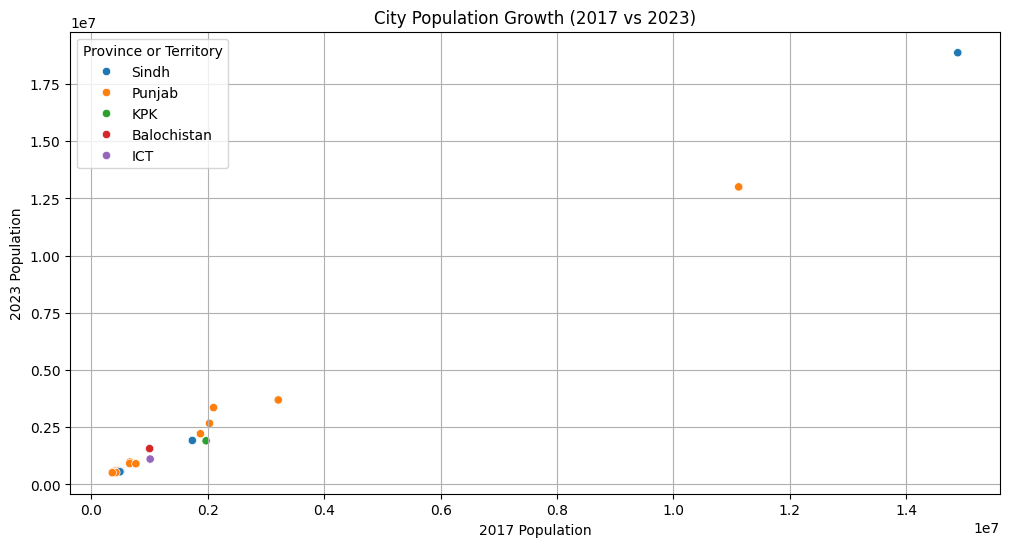

In [31]:
# Plot city population growth
plt.figure(figsize=(12, 6))
sns.scatterplot(x='2017 Population[16]', y='2023 Population[15]', hue='Province or Territory', data=city_population_growth_trends_df)
plt.title('City Population Growth (2017 vs 2023)')
plt.xlabel('2017 Population')
plt.ylabel('2023 Population')
plt.legend(title='Province or Territory')
plt.grid(True)
plt.show()